# La terminal e iPython: directorio de trabajo

In [1]:
!pwd

/srv/userhome/jp.mallarino50/FISI2028-202010/ejercicios/semana2


In [2]:
!cd ..

In [3]:
!pwd

/srv/userhome/jp.mallarino50/FISI2028-202010/ejercicios/semana2


## Cambiar el directorio de trabajo? Tenemos que usar los comandos "magic" con `%`

In [4]:
%cd ..

/srv/userhome/jp.mallarino50/FISI2028-202010/ejercicios


In [5]:
!pwd

/srv/userhome/jp.mallarino50/FISI2028-202010/ejercicios


### Automagic? `%automagic`

In [6]:
cd semana2

/srv/userhome/jp.mallarino50/FISI2028-202010/ejercicios/semana2


## Otros comandos!

In [7]:
!ls -lha

total 48K
drwxrwxr-x 4 jp.mallarino50 jp.mallarino50 4.0K Feb  2 21:15 .
drwxrwxr-x 4 jp.mallarino50 jp.mallarino50 4.0K Jan 28 13:00 ..
drwxr-xr-x 2 jp.mallarino50 jp.mallarino50 4.0K Feb  2 21:13 .empty
drwxr-xr-x 2 jp.mallarino50 jp.mallarino50 4.0K Feb  2 21:10 .ipynb_checkpoints
-rw-rw-r-- 1 jp.mallarino50 jp.mallarino50  105 Jan 28 13:00 requirements.txt
-rw-rw-r-- 1 jp.mallarino50 jp.mallarino50  28K Feb  2 21:15 resumen.ipynb


## Info de la terminal a Python?

In [8]:
env = !printenv

In [9]:
print(env)

['TERM=xterm-color', 'SHELL=/bin/bash', 'CLICOLOR=1', 'JPY_API_TOKEN=ae6ac152e3054d26911454a8e5f4f5ae', 'CONDA_SHLVL=1', 'CONDA_PROMPT_MODIFIER=(fisi2028) ', 'USER=jp.mallarino50', 'JUPYTERHUB_BASE_URL=/jhub/', 'JUPYTERHUB_CLIENT_ID=jupyterhub-user-jp.mallarino50', 'CONDA_EXE=/srv/anaconda3/bin/conda', 'JUPYTERHUB_API_TOKEN=ae6ac152e3054d26911454a8e5f4f5ae', 'KERNEL_LAUNCH_TIMEOUT=40', 'JPY_PARENT_PID=6872', 'PAGER=cat', '_CE_CONDA=', 'PATH=/srv/anaconda3/envs/fisi2028/bin:/srv/anaconda3/condabin:/srv/anaconda3/bin:/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin', 'CONDA_PREFIX=/srv/anaconda3/envs/fisi2028', 'PWD=/srv/userhome/jp.mallarino50/FISI2028-202010/ejercicios/semana2', 'MPLBACKEND=module://ipykernel.pylab.backend_inline', 'JUPYTERHUB_SERVER_NAME=', 'LANG=en_US.UTF-8', 'JUPYTERHUB_API_URL=http://127.0.0.1:8081/jhub/hub/api', '_CE_M=', 'SHLVL=1', 'HOME=/srv/userhome/jp.mallarino50', 'JUPYTERHUB_USER=jp.mallarino50', 'BEAKERX_AUTOTRANSLATION_PASSWORD=A5dcthskxzPEtc4jXfhmzW

In [10]:
type(env)

IPython.utils.text.SList

## Info de Python a la terminal?

In [11]:
msg = "Este es un mensaje"

In [12]:
!echo {msg}

Este es un mensaje


## Podemos listar los paquetes instalados? Instalar paquetes?

In [13]:
which conda

SyntaxError: invalid syntax (<ipython-input-13-b8055a3ad329>, line 1)

In [14]:
!pip list --outdated

Package       Version Latest Type 
------------- ------- ------ -----
configparser  3.7.3   4.0.2  wheel
ipykernel     5.1.3   5.1.4  wheel
PyQt5         5.12.3  5.14.1 wheel
PyQt5-sip     4.19.18 12.7.1 wheel
PyQtWebEngine 5.12.1  5.14.0 wheel


In [15]:
!pip show ipykernel

Name: ipykernel
Version: 5.1.3
Summary: IPython Kernel for Jupyter
Home-page: https://ipython.org
Author: IPython Development Team
Author-email: ipython-dev@scipy.org
License: BSD
Location: /srv/anaconda3/envs/fisi2028/lib/python3.8/site-packages
Requires: tornado, ipython, jupyter-client, traitlets
Required-by: 


### Importancia de usar la libreria `sys` de Python: `pip` y `conda`

In [16]:
import sys
print(sys.prefix)

/srv/anaconda3/envs/fisi2028


In [17]:
!conda install --yes --prefix {sys.prefix} pandas numpy matplotlib scikit-learn configparser scipy seaborn pytest traitlets

Solving environment: done

# All requested packages already installed.



In [110]:
!conda install --yes --prefix {sys.prefix} numba cython progressbar2 tweepy

Solving environment: done

## Package Plan ##

  environment location: /srv/anaconda3/envs/fisi2028

  added / updated specs:
    - cython
    - numba
    - progressbar2
    - tweepy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cffi-1.13.2                |   py38h8022711_0         222 KB  conda-forge
    chardet-3.0.4              |        py38_1003         170 KB  conda-forge
    cryptography-2.8           |   py38h72c5cf5_1         620 KB  conda-forge
    idna-2.8                   |        py38_1000         103 KB  conda-forge
    pycparser-2.19             |           py38_1         172 KB  conda-forge
    pyopenssl-19.1.0           |           py38_0          83 KB  conda-forge
    pysocks-1.7.1              |           py38_0          27 KB  conda-forge
    requests-2.22.0            |           py38_1          84 KB  conda-forge
    requests-oauthlib-1.2.0    |             py

In [19]:
!conda update --yes --prefix {sys.prefix} python-utils

Solving environment: done

# All requested packages already installed.



In [20]:
!which pip

/srv/anaconda3/envs/fisi2028/bin/pip


In [21]:
print(sys.executable)

/srv/anaconda3/envs/fisi2028/bin/python


In [ ]:
!{sys.executable} -m pip install pandas numpy matplotlib scikit-learn

## Verificar existencia de paquetes?

In [22]:
import pkg_resources
def checkDeps(filename):
    try:
        with open(filename,'r') as f:
            reqs = [line for line in f]
        packages = ", ".join([pkg_resources.Requirement.parse(line).name for line in reqs])
        deps = pkg_resources.require(reqs)
        del reqs
    except ValueError as err:
        print("ERROR: Invalid requirement specifier ->",err)
        raise ValueError
checkDeps(filename='requirements.txt')

# Tipos de variables en Python y operaciones
* `None`
* integers, floats
* tuples, lists
* strings
* unordered dictionaries and ordered dictionaries
> Funciones convenientes:
> * `?` o `??`
> * `type(#var)`
> * `dir(#var)`
> * `isinstance(#var,<type>)`
> * `help(<#any>)`
> * `sys.float_info` & `sys.int_info`
> * `del` y `sys.getsizeof(#var)`

# Condicionales y ciclos: `if`, `elif`, `else`, "one liner", `for`, `while`

# Scoping en Python y su utilidad: la sentencia `with`

# Funciones,recurrencia y librerías

# Numpy: Vectores y arreglos, operaciones

# Visualización: [PyViz.org](https://pyviz.org/)

In [23]:
a = 1

In [24]:
type(a)

int

In [25]:
a = [5,4,6,2]

In [26]:
if isinstance(a,dict):
    print("soy un dictionario")
elif isinstance(a,tuple):
    print("soy una tupla")
elif isinstance(a,list):
    print("soy una lista")
elif isinstance(a,str):
    print("soy una cadena")
else:
    raise TypeError("Mismatch of type")

soy una lista


In [27]:
for it in range(10):
    it = it-1 if it%2==0 else 2*it; print("iterator: %ld"%it); # Nota: el punto y coma ";" es frecuente en C y C++, ¡en Python también se puede usar para delimitar comandos!

iterator: -1
iterator: 2
iterator: 1
iterator: 6
iterator: 3
iterator: 10
iterator: 5
iterator: 14
iterator: 7
iterator: 18


In [28]:
it

18

In [29]:
with open('requirements.txt', 'r') as f:
    for line in f:
        print(line,end='')

ipython
traitlets>=4.3.1
pandas
numpy>=1.11.3
progressbar2>=3.34.0
matplotlib
seaborn
scikit-learn
scipy


In [30]:
f

<_io.TextIOWrapper name='requirements.txt' mode='r' encoding='UTF-8'>

In [31]:
for line in f:
    print(line,end='')

ValueError: I/O operation on closed file.

In [32]:
dir()

['In',
 'Out',
 '_',
 '_10',
 '_24',
 '_28',
 '_30',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'a',
 'checkDeps',
 'env',
 'exit',
 'f',
 'get_ipython',
 'it',
 'line',
 'msg',
 'pkg_resources',
 'quit',
 'sys']

In [33]:
b = []

In [34]:
b.append(2)

In [35]:
b

[2]

In [36]:
dir(b)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [37]:
try:
    b.index(1)
except ValueError:
    print("no encontre el valor")

no encontre el valor


In [38]:
def f1(x,y):
    if y == 0 and x == 0:
        a = 1
    else:
        a = x**y
    return(a)

In [39]:
f1(y=2,x=3)

9

In [43]:
f1(2,3)

8

In [44]:
d = dict(x=2,y=3)
l = [2,3]

In [45]:
f1(*l)

8

In [46]:
f1(**d)

8

In [52]:
def f2(x,y,n=0,*args,**kwargs):
    print('args:',type(args))
    print('\t',args)
    print('kwargs:',type(kwargs))
    print('\t',kwargs)
    if n== 0:
        return(f1(x,y))
    else:
        return(f1(y,x))

In [53]:
f2(2,3,0)

args: <class 'tuple'>
	 ()
kwargs: <class 'dict'>
	 {}


8

In [54]:
f2(2,3,1)

args: <class 'tuple'>
	 ()
kwargs: <class 'dict'>
	 {}


9

In [55]:
f2(2,3,1,3,4,5)

args: <class 'tuple'>
	 (3, 4, 5)
kwargs: <class 'dict'>
	 {}


9

In [56]:
f2(2,3,1,nam=4,3,4,5)

SyntaxError: positional argument follows keyword argument (<ipython-input-56-2ad8b834e9d3>, line 1)

In [57]:
f2(2,3,1,3,4,5,nam=4)

args: <class 'tuple'>
	 (3, 4, 5)
kwargs: <class 'dict'>
	 {'nam': 4}


9

In [87]:
def factorial(n):
    if n == 0:
        return 1
    return n*factorial(n-1)
def f3(n,k,p):
    if not (isinstance(n,int) and isinstance(k,int) and n >= k and k >=0):
        print("Error")
        return None
    return f1(p,k)*f1(1-p,n-k)*(factorial(n)//(factorial(n-k)*factorial(k)))

In [89]:
s = 0
for it in range(4+1):
    print("el",it,"val=",f3(4,it,0.5))
    s += f3(4,it,0.5)

el 0 val= 0.0625
el 1 val= 0.25
el 2 val= 0.375
el 3 val= 0.25
el 4 val= 0.0625


In [91]:
print(s)

1.0


$$1,1,2,3,5,8,13,...$$

In [80]:
def fibo(n):
    if n==1:
        return 1
    if n==2:
        return 1
    return(fibo(n-1)+fibo(n-2))
    

In [86]:
fibo(40)

102334155

# ¿Cómo verificamos las variables que tenemos *cargadas* en el entorno?

In [58]:
import sys
# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']
# Get a sorted list of the objects and their sizes
tmpvar = sorted(
    [(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars],
    key=lambda x: x[1],
    reverse=True
)
print(tmpvar)
del ipython_vars,tmpvar

[('env', 360), ('d', 232), ('f', 208), ('checkDeps', 136), ('f1', 136), ('f2', 136), ('a', 88), ('b', 88), ('l', 72), ('msg', 67), ('line', 55), ('it', 28)]


# Algunos temas faltantes

* Cargar librerías: math, numpy y matplotlib
* Trabajar con numpy
* Graficar con matplotlib y Seaborn

Aunque no hayamos podido ver con detalle estos temas, los invito a que revisen la documentación que está en los siguientes enlaces:
* https://numpy.org/doc/1.17/reference/index.html
* https://matplotlib.org/tutorials/introductory/lifecycle.html
* https://seaborn.pydata.org/api.html

**A continuación haré dos ejemplos de tiro parabólico usando Numpy**

Suponga que queremos graficar el tiro parabólico teniendo en cuenta que conocemos la posición $(0,0)$ y velocidad inicial ($v_0$ a un ángulo $\theta$) como parámetros para una función. Para ellos vamos a emplear dos métodos:
1. Calcular las parejas $(x,y)$ utilizando el parámetro temporal. Sabemos que el tiempo total de caida es de $t_c=\frac{2v_0}{g}\sin\theta$
1. Calcular las parejas $(x,y)$ a partir de $y=f(x)$ que en el caso de tiro parabólico es $y=\tan\theta\,x-\frac{g}{2v_{0}^{2}\cos^2\theta}x^2$ siendo que el alcance máximo es $x_M=\frac{v_{0}^{2}}{g}\sin(2\theta)$

## Método 1:

In [66]:
# importamos las librerías de referencia
import math

# creamos la func que a valores de tiempo nos devuelve una "dupla" x,y
def parabolico1(t,v0,theta,g=9.8):
    x = v0*math.cos(theta)*t
    y = v0*math.sin(theta)*t - 0.5*g*(t**2)
    return (x,y)

In [71]:
# probamos la func
print("test: v0=10, theta=45º");
v0=10; theta=math.pi/4; g=9.8; tc=math.sin(theta)*2*v0/g
print("\tXmax=",parabolico1(tc,v0,theta,g=g))
print("\tHmax=",parabolico1(0.5*tc,v0,theta))
del v0,theta,g,tc

test: v0=10, theta=45º
	Xmax= (10.204081632653061, -1.7763568394002505e-15)
	Hmax= (5.1020408163265305, 2.5510204081632644)


### Creamos un vector de tiempos para obtener $(x,y)$ en cada momento usando **Numpy**

In [77]:
import numpy as np
# Fijamos # de puntos para graficar
NUM_T=100
# Fijamos condiciones iniciales
v0=10; theta=np.pi/4; g=9.8
# creamos el vector de tiempos T
T = np.linspace(0,np.sin(theta)*2*v0/g,NUM_T)
# creamos los vectores de coordenadas x,y
X = np.zeros(NUM_T)
Y = np.zeros(NUM_T)

In [79]:
# llenamos los vectores x,y
for it,t in enumerate(T):
    X[it],Y[it] = parabolico1(t,v0,theta,g)

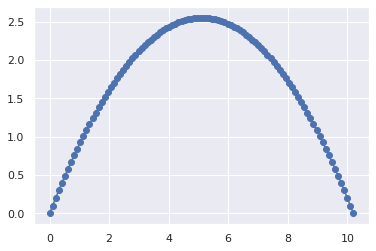

In [86]:
# Graficamos
import seaborn as sns; sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.clf()
plt.scatter(X,Y)
plt.plot(X,Y)

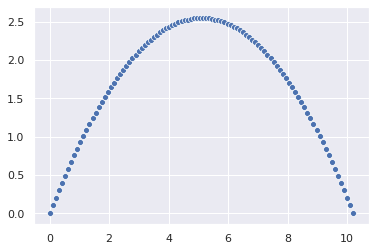

In [88]:
# intentamos otra libreria
sns.scatterplot(X,Y)

In [91]:
# Limpiamos la basura
del NUM_T,g,v0,theta,T,X,Y

> **Existe otra manera de llenar los vectores X y Y respectivamente?** *Si* gracias a la vectorización de Numpy (Ver [Vectorización en Numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html))

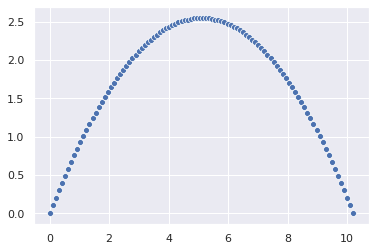

In [92]:
# Fijamos # de puntos para graficar
NUM_T=100
# Fijamos condiciones iniciales
v0=10; theta=np.pi/4; g=9.8
# creamos el vector de tiempos T
T = np.linspace(0,np.sin(theta)*2*v0/g,NUM_T)
# creamos los vectores de coordenadas con una sola linea!
X,Y=parabolico1(T,v0,theta,g)
# graficamos!
sns.scatterplot(X,Y)

In [93]:
# Limpiamos la basura
del NUM_T,g,v0,theta,T,X,Y

## Método 2:

In [97]:
# creamos la func que a valores de pos en X nos devuelve pos en Y
def parabolico2(x,v0,theta,g=9.8):
    y = x*np.tan(theta) - (g/(2*(v0**2)*(np.cos(theta)**2)))*(x**2)
    return y

In [100]:
# probamos la func
print("test: v0=10, theta=45º");
v0=10; theta=math.pi/4; g=9.8; x_max=np.sin(2*theta)*v0**2/g
print("\tat X=0, Y=",parabolico2(0,v0,theta,g=g))
print("\tat X=%lf, Y="%(x_max/2),parabolico2(x_max/2,v0,theta))
print("\tat X=%lf, Y="%x_max,parabolico2(x_max,v0,theta))
del v0,theta,g,x_max

test: v0=10, theta=45º
	at X=0, Y= 0.0
	at X=5.102041, Y= 2.5510204081632653
	at X=10.204082, Y= 1.7763568394002505e-15


### Creamos un vector de pos en $x$ para obtener pos en $y$ usando **Numpy**

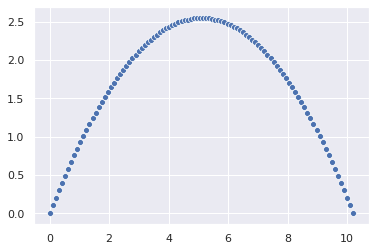

In [108]:
import numpy as np
# Fijamos # de puntos para graficar
NUM_X=100
# Fijamos condiciones iniciales
v0=10; theta=np.pi/4; g=9.8
# creamos el vector de tiempos T
X = np.linspace(0,np.sin(2*theta)*v0**2/g,NUM_X)
# creamos el vector de pos en y en una sola linea aprovechando vectorizacion
Y = parabolico2(X,v0,theta,g=g)
# Graficamos
sns.scatterplot(X,Y)

In [109]:
# Limpiamos la basura
del NUM_X,g,v0,theta,X,Y

# Semana 3: principios de probabilidad

# Ejercicios para la clase:

* Utilizar [Numpy Random](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html) para generar números aleatorios con una distribución uniforme
* Correr los tests de verificación de aleatoriedad (estocasticidad) y ergodicidad
* Graficar la distribución uniforme, exponencial, $\Gamma$-gamma y normal con Seaborn [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)
* Hallar la asimetría y la curtosis de la distribución normal y verificar el valor encontrado por el generador
* ¿En qué se parecen la distribución exponencial y la distribución Gamma?

## Para el ejercicio a entregar la siguiente semana
* Revisar repositorios de datos: [538](http://fivethirtyeight.com/), Google, Amazon y Wikipedia
* Descargar la base de datos de [FIFA 20](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset)
* Instalar y configurar Twitter developer account